## Load Packages and Dependencies

In [38]:
from inference import Inference, traverse_files
from network import AttenUnet

%reload_ext autoreload
%autoreload 2

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import glob
import random

import warnings
warnings.filterwarnings('ignore')

### Load Model and Inference 

In [39]:
# Inference already included preprocess and postprocess 

# initialize model
model = AttenUnet()
checkpoint = '../tmp/Attenunet256_v3.2.1/checkpoint.pth.tar'

# initialize inference, which includes load pretrained weight for model
# and preprocess nifti images and postprocess predictions
inference = Inference(model, checkpoint)                      

### Perform prediction on a patient case

In [40]:
patients = traverse_files('../data/ACDC/testing/')

# only choose image files
patients = [f for f in patients if f.find('_gt.nii.gz') == -1 and f.find("_4d") == -1]

seed = 50
patient = patients[random.randint(0, len(patients))]

pred_masks = inference.predict(patient)
print('pred mask shape:\t', pred_masks.shape)

pred mask shape:	 (8, 224, 180)


### Visualize predicted segmentation

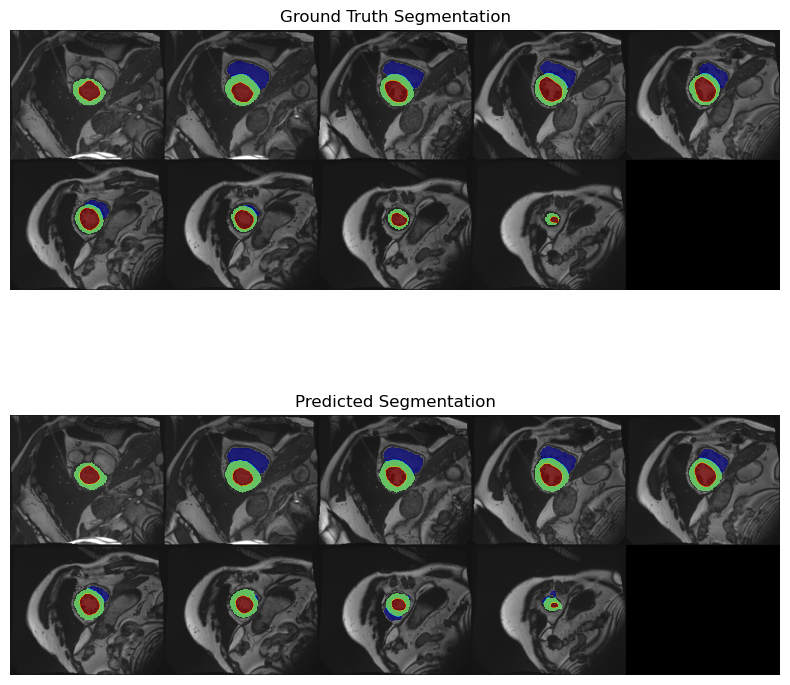

In [43]:
seed = 50
patient = patients[random.randint(0, len(patients))]

inference.plot(image_file=patient, gt_file=patient.replace('.nii.gz', '_gt.nii.gz'));

### Plot Training Losses

Text(0, 0.5, 'Metrics')

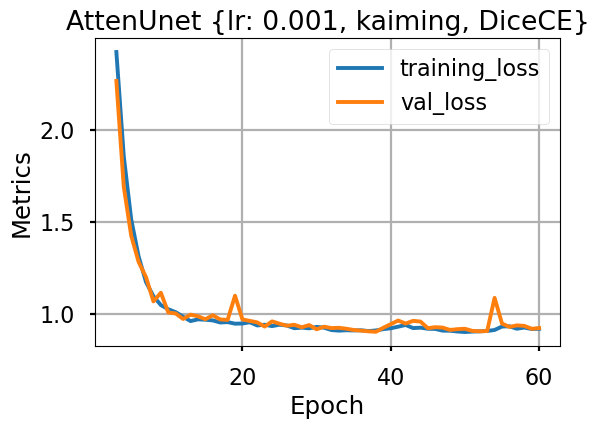

In [51]:
df = pd.read_csv('../tmp/Attenunet256_v3.2.1/checkpoints.csv')

plt.style.use('seaborn-v0_8-poster')
f, ax = plt.subplots(figsize=(6, 4))
df.iloc[3:, 1:3].astype('float').plot(ax=ax)
ax.set_title('AttenUnet {lr: 0.001, kaiming, DiceCE}')
ax.grid('on')
ax.set_xlabel('Epoch')
ax.set_ylabel('Metrics')
# f.savefig('./tmp/loss.png', dpi=300,
#         transparent=False,
#         bbox_inches='tight');

### Compute Metrics

In [55]:
df = pd.read_csv('../tmp/Attenunet256_v3.2.1/attenv3.2_ed.csv', index_col=0)
df['Dice LV'].mean(), df['Dice RV'].mean(), df['Dice MYO'].mean()

(0.9673660329680459, 0.9381267843940109, 0.8888898083820977)

In [56]:
df.head()

,Name,Dice LV,Volume LV,Err LV(ml),Dice RV,Volume RV,Err RV(ml),Dice MYO,Volume MYO,Err MYO(ml),mean Dice LV,mean Dice RV,mean Dice MYO
0,patient101_frame01,0.977227,220.633238,-1.964893,0.960550,128.794686,-0.995905,0.895641,137.300250,9.716799,0.967366,0.938127,0.88889
1,patient102_frame01,0.966936,74.877930,-4.565430,0.975077,98.754883,-1.342773,0.907886,81.665039,8.544922,0.967366,0.938127,0.88889
2,patient103_frame01,0.974512,173.364258,-4.809570,0.900168,99.658203,10.766602,0.921166,182.080078,8.325195,0.967366,0.938127,0.88889
3,patient104_frame01,0.966300,141.760775,0.093460,0.932367,137.984973,2.635584,0.904497,162.434221,2.317819,0.967366,0.938127,0.88889
4,patient105_frame01,0.968930,126.386107,0.308474,0.961064,116.559015,1.101692,0.912430,148.508083,12.691492,0.967366,0.938127,0.88889
